# Second order distortions
## Defining the mapping between the lens and source planes

The lens distortions up to the second order is written as follows:

\begin{equation}
\beta_i = \sum^{2}_{j=1}\frac{\partial \beta_i}{\partial \theta_j} + \sum^{2}_{j=1}\sum^{2}_{k=1}\frac{1}{2}\frac{\partial^2 \beta_i}{\partial \theta_j \theta_k}\theta_j \theta_k
\end{equation}

where $\beta$ is the source position vector on the source plane, and $\theta$ on the lens plane. We define the matrices

\begin{equation}
\begin{aligned}[c]
    A_{ij} = \frac{\partial \beta_i}{\partial \theta_j} \\
    D_{ijk} = \frac{\partial^2 \beta_i}{\partial \theta_j \theta_k}
\end{aligned}
\end{equation}


We rewrite this equation in terms of matrices:

\begin{equation}
\beta_i = \sum^{2}_{j=1}A_{ij} + \sum^{2}_{j=1}\sum^{2}_{k=1}D_{ijk}\theta_j \theta_k
\end{equation}

## Expanding the terms in $\beta_i$

Using the lens equation

\begin{equation}
\overrightarrow{\beta} = \overrightarrow{\theta} - \overrightarrow{\alpha} = \overrightarrow{\theta} - \overrightarrow{\nabla}\Psi(\overrightarrow{\theta}),
\end{equation}

where $\Psi$ is the effective lensing potential, one derive every component of the matrix $A$ and write them in terms of the convergence $\kappa$ and the shear $\gamma$:

\begin{equation}
    A = 
    \begin{bmatrix}
    1 - \kappa - \gamma_1 & -\gamma_2\\
    -\gamma_2 & 1 - \kappa + \gamma_1
    \end{bmatrix}   
\end{equation}

Now we derive the second-order distortion matrix:

\begin{equation}
    D_{ijk} = \frac{\partial}{\partial \theta_k} A_{ij} = ...
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
def ray_trace(x1,x2,params):
    kappa,gamma1,gamma2, F1, F2, G1, G2 = params
    
    # first order distortions
    A11 = 1-kappa-gamma1
    A22 = 1-kappa+gamma1
    A12 = -gamma2
    # second order distortions
    D111 = -1/2 * (G1 + 3*F1)
    D222 = -1/2 *(3*F2 - G2)
    D112 = -1/2 *(F2 + G2)
    D221 = -1/2 *(F1 - G1)
    
    # ray-trace back to 
    beta1 = A11*x1 + A12*x2 + 1/2*D111*x1**2 + D112*x1*x2 + 1/2*D221*x2**2
    beta2 = A22*x2 + A12*x1 + 1/2*D222*x2**2 + D221*x1*x2 + 1/2*D112*x1**2
    
    return beta1,beta2

Here, we consider a circular source centered at $\overrightarrow{\beta} = (0,0)$ with a Sersic surface brightness profile $I(\overrightarrow{\beta})$ with the form below:

In [3]:
def sersic_profile(x1,x2,n=4,re=4):
    beta = np.sqrt(x1**2 + x2**2)
    bn = 1.992*n - 0.3271
    return np.exp(-bn * (beta/re)**(1/n) - 1)

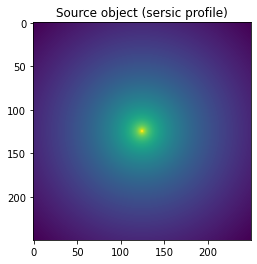

In [7]:
# define source object grid
nPixels = 250 # 250x250 pixels
pc = np.linspace(-1,1,nPixels) # image scaled from -1 to 1
x1,x2 = np.meshgrid(pc,pc)

source_image = sersic_profile(x1,x2)
plt.imshow(source_image, norm=LogNorm(), cmap='seismic')
plt.title('Source object (sersic profile)')
plt.show()

Since surface brightness is conserved from plane to plane, we have

\begin{equation}
I(\overrightarrow{\theta}) = I(\overrightarrow{\beta})
\end{equation}

Below we raytrace the source onto the lens plane:

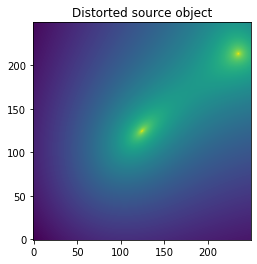

In [8]:
distortion_params = [0, 0, 0.3, 0.7, 0.5, 0.2, 0]
y1,y2 = ray_trace(x1,x2,distortion_params)
lensed_image = sersic_profile(y1,y2)

plt.imshow(lensed_image, norm=LogNorm(), origin='lower')
plt.title('Distorted source object')
plt.show()

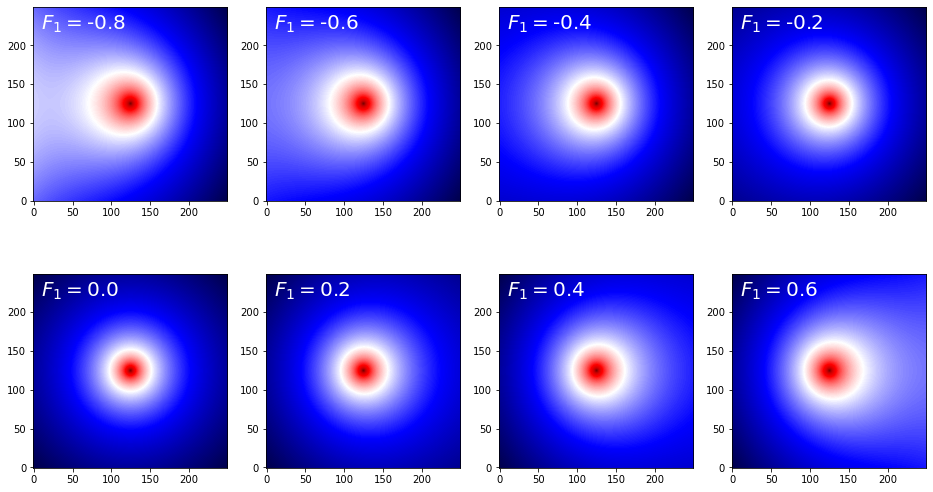

In [6]:
fig,ax=plt.subplots(2,4,figsize=(16,9))

for i in range(8):
    iF1 = round(-0.8 + i*0.2, 2)
    distortion_params = [0, 0, 0, iF1, 0, 0, 0]
    y1,y2 = ray_trace(x1,x2,distortion_params)
    lensed_image = sersic_profile(y1,y2)
    
    if i<4:
        ax[0,i%4].imshow(lensed_image, norm=LogNorm(), cmap='seismic', origin='lower')
        ax[0,i%4].text(10,220,'$F_1=${}'.format(iF1),color='white',fontsize=20)
    else:
        ax[1,i%4].imshow(lensed_image, norm=LogNorm(), cmap='seismic', origin='lower')
        ax[1,i%4].text(10,220,'$F_1=${}'.format(iF1),color='white',fontsize=20)
    
plt.show()